# Frequency Analysis
To determine the dominant frequency in the signal, we use the Fast Fourier Transform to convert the data string from the time domain to the freqency domain.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Read in the data
# the column widths are specified based on the data file format
df = pd.read_fwf("vonkarman010mm.dat", widths=[8, 10, 9, 9, 9, 9, 6, 6, 6, 6, 7, 7, 7, 7, 6, 6, 6, 5])
# to check the inport
#print(df.shape)
#print(df.head())

## Velocity
We'd like to know the average velocities that were recorded by the ADV.

In [81]:
# convert to numpy array for analysis
adv = np.array(df)
#print(adv.shape)
u = adv[:, 2]  # x-component of velocity
print("u: ", u.mean(), "m/s")  # mean x-velocity
v = adv[:, 3]  # y-component of velocity
print("v: ", v.mean(), "m/s")  # mean y-velocity
w1 = adv[:, 4]  # first z-component of velocity
print("w1: ", w1.mean(), "m/s")  # mean z-velocity
w2 = adv[:, 5]  # second z-component of velocity
print("w2: ", w2.mean(), "m/s")  # mean z-velocity (second derived value)

u:  -0.15031374736207415 m/s
v:  0.023250829062405786 m/s
w1:  0.003511878203195659 m/s
w2:  0.0032275248718721737 m/s


To interpret this, we look at the direction of the flow and the marked sensor arm on the ADV; the marked sensor arm is in the positive x-direction.  When we see a negative $u$, this is opposite the marked arm.

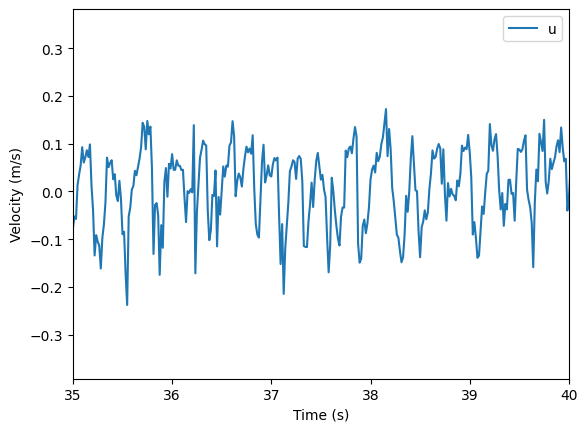

In [ ]:
f = 64 # sampling frequency in Hz
t = (adv[:, 0]) / f  # time in seconds
#plt.plot(t, u)
plt.plot(t, v)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.xlim(35,40)
plt.legend(['u', 'v'])
plt.show()

If we count the number of troughs in the plot, I get 17 (we're looking from 35 to 40 right now).  $(17)/(40-35) = 3.4$.

## Analysis with FFT

In [83]:
# Use the Fast Fourier Transform (FFT) from numpy 
fft_result = np.fft.fft(v)
# Define the frequency range from the sampling frequency
frequencies = np.fft.fftfreq(len(v), d=1/f)

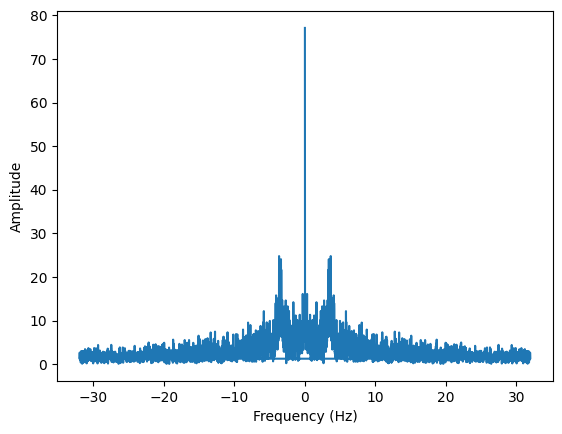

In [84]:
# Plotting the spectrum
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

[3, 4]


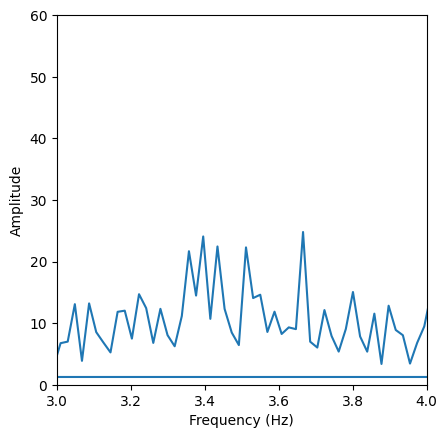

In [ ]:
# the raw result shows the full frequency range including negative frequencies.  We don't need those for this analysis.
a = [3,4]  # frequency range to plot
ar = (a[1]-a[0])/60 # aspect ratio to make square
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(a) # use a reasonable range for the frequencies - be sure to be able to read off the dominant frequency
plt.ylim(0, 60)
plt.gca().set_aspect(ar, adjustable='box') # set aspect ratio to be equal

# Save the plot
# Save as EPS
#plt.savefig("plot.eps", format="eps")
# encapsulated postscript format is preferred for publication, but it is harder with which to work.
# Save as PNG
plt.savefig("von010mm.png", format="png", dpi=300)  # dpi controls resolution

plt.show()

While this does look like there is another spike at 3.65, the clump of dominant frequencies appear to center around 3.4.